In [1]:
import cv2
import matplotlib.pyplot as plt
from yolo_config import Config
import os
import pandas as pd

In [2]:
def show_image(training_dir, file_name):
    try:
        img = cv2.imread(f'{training_dir}/{file_name}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5,5), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Image not available")
        print(e)
        pass


def plot_detection_comparison(training_dir):
    plt.figure(figsize=(5,10), dpi=200)

    plt.subplot(1, 2, 1)
    img = cv2.imread(f'{training_dir}/val_batch0_labels.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title("Labels", fontsize=5)
    plt.axis('off')
    plt.imshow(img)

    plt.subplot(1, 2, 2)
    img = cv2.imread(f'{training_dir}/val_batch0_pred.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title("Detections", fontsize=5)
    plt.axis('off')
    plt.imshow(img)

    plt.show()


In [3]:
all_results_path = os.path.join(Config.RUNS_DIR, Config.DATASET, 'all_results.csv')
all_results = pd.read_csv(all_results_path, index_col=0)
all_results.loc[all_results['metrics/mAP50(B)'].idxmax()]


metrics/precision(B)    0.0
metrics/recall(B)       0.0
metrics/mAP50(B)        0.0
metrics/mAP50-95(B)     0.0
fitness                 0.0
CM(0,0)                 0.0
CM(0,1)                 0.0
CM(0,2)                 0.0
CM(1,0)                 0.0
CM(1,1)                 0.0
CM(1,2)                 0.0
CM(2,0)                 0.8
CM(2,1)                 0.6
CM(2,2)                 0.0
Name: yolov8n.pt_conf=0.1, dtype: float64

Fold 1


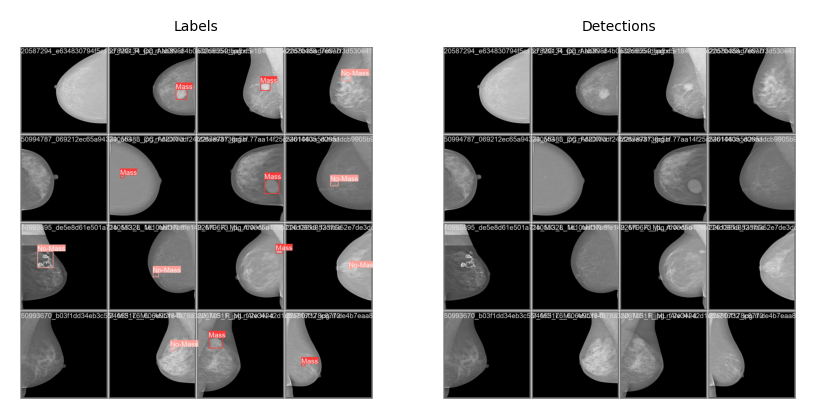

Fold 2


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


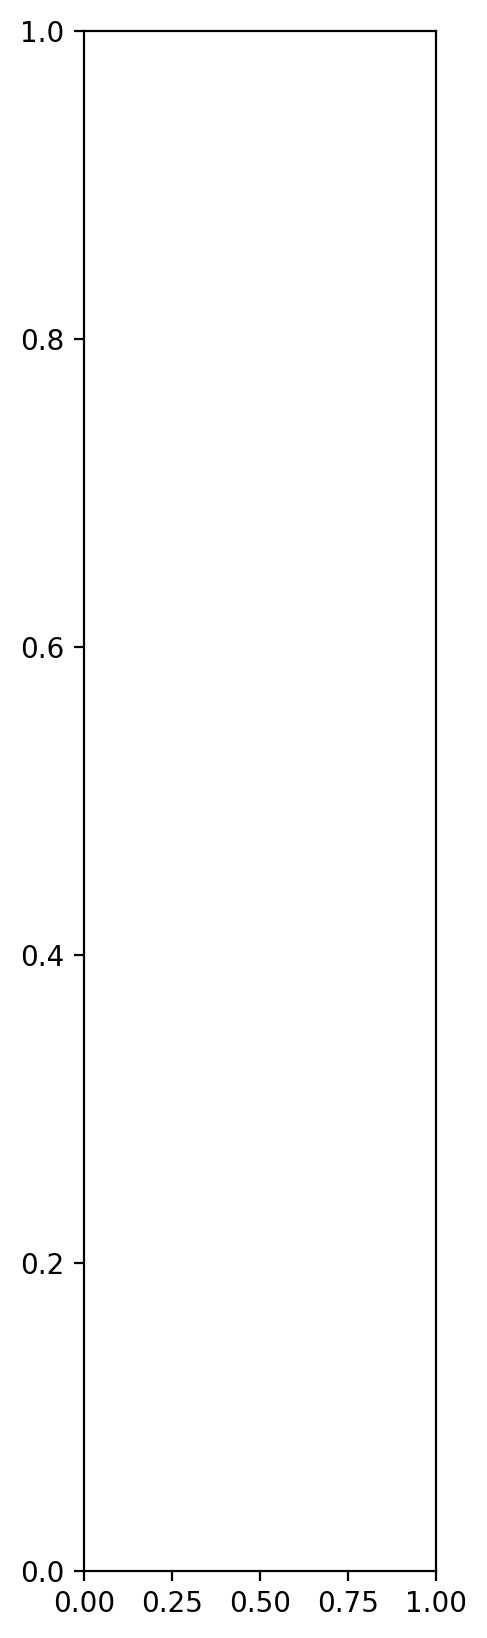

In [5]:
model_size = 'yolov8n.pt'
threshold = 0.1

for fold in range(1,11):
    model_dir = f'{model_size}_conf={threshold}'
    fold_dir = f'fold_{fold}'
    validation_path = os.path.join(Config.RUNS_DIR, Config.DATASET, model_dir, fold_dir, 'val')
    print(f"Fold {fold}")
    plot_detection_comparison(validation_path)
